## Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

## Import the dataset

In [2]:
stats = pd.read_csv('game_stats.csv')

## Summarize the data

In [3]:
stats.head(5)

Date          Team      Opponent  Goal Scored  Ball Possession %  \
0  14-06-2018        Russia  Saudi Arabia            5                 40   
1  14-06-2018  Saudi Arabia        Russia            0                 60   
2  15-06-2018         Egypt       Uruguay            0                 43   
3  15-06-2018       Uruguay         Egypt            1                 57   
4  15-06-2018       Morocco          Iran            0                 64   

   Attempts  On-Target  Off-Target  Blocked  Corners  ...  Yellow Card  \
0        13          7           3        3        6  ...            0   
1         6          0           3        3        2  ...            0   
2         8          3           3        2        0  ...            2   
3        14          4           6        4        5  ...            0   
4        13          3           6        4        5  ...            1   

   Yellow & Red  Red  Man of the Match  1st Goal        Round  PSO  \
0             0    0               Yes      12.0  Group Stage   No   
1             0    0                No       NaN  Group Stage   No   
2             0    0                No       NaN  Group Stage   No   
3             0    0               Yes      89.0  Group Stage   No   
4             0    0                No       NaN  Group Stage   No   

   Goals in PSO  Own goals  Own goal Time  
0             0        NaN            NaN  
1             0        NaN            NaN  
2             0        NaN            NaN  
3             0        NaN            NaN  
4             0        1.0           90.0  

[5 rows x 27 columns]

In [4]:
stats.shape

(128, 27)

In [5]:
stats.describe()

Goal Scored  Ball Possession %    Attempts   On-Target  Off-Target  \
count   128.000000         128.000000  128.000000  128.000000  128.000000   
mean      1.320312          49.992188   12.593750    3.914062    5.273438   
std       1.156519          10.444074    5.245827    2.234403    2.409675   
min       0.000000          25.000000    3.000000    0.000000    1.000000   
25%       0.000000          42.000000    9.000000    2.000000    4.000000   
50%       1.000000          50.000000   12.000000    3.500000    5.000000   
75%       2.000000          58.000000   15.000000    5.000000    7.000000   
max       6.000000          75.000000   26.000000   12.000000   11.000000   

          Blocked     Corners    Offsides  Free Kicks       Saves  ...  \
count  128.000000  128.000000  128.000000  128.000000  128.000000  ...   
mean     3.359375    4.718750    1.343750   14.890625    2.726562  ...   
std      2.403195    2.446072    1.193404    4.724262    2.049447  ...   
min      0.000000    0.000000    0.000000    5.000000    0.000000  ...   
25%      1.750000    3.000000    0.000000   11.000000    1.000000  ...   
50%      3.000000    5.000000    1.000000   15.000000    2.000000  ...   
75%      4.000000    6.000000    2.000000   18.000000    4.000000  ...   
max     10.000000   11.000000    5.000000   26.000000    9.000000  ...   

            Passes  Distance Covered (Kms)  Fouls Committed  Yellow Card  \
count   128.000000              128.000000       128.000000   128.000000   
mean    462.648438              106.664062        13.546875     1.695312   
std     151.186311               11.749537         4.619131     1.325454   
min     189.000000               80.000000         5.000000     0.000000   
25%     351.000000              101.000000        10.000000     1.000000   
50%     462.000000              104.500000        13.000000     2.000000   
75%     555.250000              109.000000        16.000000     2.000000   
max    1137.000000              148.000000        25.000000     6.000000   

       Yellow & Red         Red   1st Goal  Goals in PSO  Own goals  \
count    128.000000  128.000000  94.000000    128.000000       12.0   
mean       0.015625    0.015625  39.457447      0.203125        1.0   
std        0.124507    0.124507  24.496506      0.807049        0.0   
min        0.000000    0.000000   1.000000      0.000000        1.0   
25%        0.000000    0.000000  18.250000      0.000000        1.0   
50%        0.000000    0.000000  39.000000      0.000000        1.0   
75%        0.000000    0.000000  54.750000      0.000000        1.0   
max        1.000000    1.000000  90.000000      4.000000        1.0   

       Own goal Time  
count      12.000000  
mean       45.833333  
std        29.978275  
min        12.000000  
25%        21.750000  
50%        35.000000  
75%        75.750000  
max        90.000000  

[8 rows x 21 columns]

In [6]:
stats.dtypes

Date                       object
Team                       object
Opponent                   object
Goal Scored                 int64
Ball Possession %           int64
Attempts                    int64
On-Target                   int64
Off-Target                  int64
Blocked                     int64
Corners                     int64
Offsides                    int64
Free Kicks                  int64
Saves                       int64
Pass Accuracy %             int64
Passes                      int64
Distance Covered (Kms)      int64
Fouls Committed             int64
Yellow Card                 int64
Yellow & Red                int64
Red                         int64
Man of the Match           object
1st Goal                  float64
Round                      object
PSO                        object
Goals in PSO                int64
Own goals                 float64
Own goal Time             float64
dtype: object

## Handle missing values

In [7]:
stats.isnull().sum()

Date                        0
Team                        0
Opponent                    0
Goal Scored                 0
Ball Possession %           0
Attempts                    0
On-Target                   0
Off-Target                  0
Blocked                     0
Corners                     0
Offsides                    0
Free Kicks                  0
Saves                       0
Pass Accuracy %             0
Passes                      0
Distance Covered (Kms)      0
Fouls Committed             0
Yellow Card                 0
Yellow & Red                0
Red                         0
Man of the Match            0
1st Goal                   34
Round                       0
PSO                         0
Goals in PSO                0
Own goals                 116
Own goal Time             116
dtype: int64

In [8]:
missing_values = stats.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(stats))*100
pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])

Missing values  % Missing
Own goal Time                      116    90.6250
Own goals                          116    90.6250
1st Goal                            34    26.5625
Free Kicks                           0     0.0000
Team                                 0     0.0000
Opponent                             0     0.0000
Goal Scored                          0     0.0000
Ball Possession %                    0     0.0000
Attempts                             0     0.0000
On-Target                            0     0.0000
Off-Target                           0     0.0000
Blocked                              0     0.0000
Corners                              0     0.0000
Offsides                             0     0.0000
Pass Accuracy %                      0     0.0000
Saves                                0     0.0000
Passes                               0     0.0000
Distance Covered (Kms)               0     0.0000
Fouls Committed                      0     0.0000
Yellow Card                          0     0.0000
Yellow & Red                         0     0.0000
Red                                  0     0.0000
Man of the Match                     0     0.0000
Round                                0     0.0000
PSO                                  0     0.0000
Goals in PSO                         0     0.0000
Date                                 0     0.0000

In [9]:
stats.drop(['Own goals', 'Own goal Time'], axis=1, inplace=True)
stats['1st Goal'] = stats['1st Goal'].fillna(stats['1st Goal'].mean())

In [ ]:
#replacing null values with other col info
to_replace = stats['total'].str.split('').apply(lambda x: len(x))
stats['1st Goal'] = stats['1st Goal'].fillna(to_replace)

In [10]:
stats.head(10)

Date          Team      Opponent  Goal Scored  Ball Possession %  \
0  14-06-2018        Russia  Saudi Arabia            5                 40   
1  14-06-2018  Saudi Arabia        Russia            0                 60   
2  15-06-2018         Egypt       Uruguay            0                 43   
3  15-06-2018       Uruguay         Egypt            1                 57   
4  15-06-2018       Morocco          Iran            0                 64   
5  15-06-2018          Iran       Morocco            1                 36   
6  15-06-2018      Portugal         Spain            3                 39   
7  15-06-2018         Spain      Portugal            3                 61   
8  16-06-2018        France     Australia            2                 51   
9  16-06-2018     Australia        France            1                 49   

   Attempts  On-Target  Off-Target  Blocked  Corners  ...  \
0        13          7           3        3        6  ...   
1         6          0           3        3        2  ...   
2         8          3           3        2        0  ...   
3        14          4           6        4        5  ...   
4        13          3           6        4        5  ...   
5         8          2           5        1        2  ...   
6         8          3           2        3        4  ...   
7        12          5           5        2        5  ...   
8        12          5           4        3        5  ...   
9         4          1           2        1        1  ...   

   Distance Covered (Kms)  Fouls Committed  Yellow Card  Yellow & Red  Red  \
0                     118               22            0             0    0   
1                     105               10            0             0    0   
2                     112               12            2             0    0   
3                     111                6            0             0    0   
4                     101               22            1             0    0   
5                     100               14            3             0    0   
6                     102               12            1             0    0   
7                     103               10            1             0    0   
8                     103               16            1             0    0   
9                     111               19            3             0    0   

   Man of the Match   1st Goal        Round  PSO  Goals in PSO  
0               Yes  12.000000  Group Stage   No             0  
1                No  39.457447  Group Stage   No             0  
2                No  39.457447  Group Stage   No             0  
3               Yes  89.000000  Group Stage   No             0  
4                No  39.457447  Group Stage   No             0  
5               Yes  90.000000  Group Stage   No             0  
6                No   4.000000  Group Stage   No             0  
7               Yes  24.000000  Group Stage   No             0  
8               Yes  58.000000  Group Stage   No             0  
9                No  62.000000  Group Stage   No             0  

[10 rows x 25 columns]

## Clean the data

In [11]:
print(f"Team: {stats['Team'].unique()}\n")
print(f"Opponent: {stats['Opponent'].unique()}\n")
print(f"Man of the Match: {stats['Man of the Match'].unique()}\n")
print(f"Round: {stats['Round'].unique()}\n")
print(f"PSO: {stats['PSO'].unique()}\n")

Team: ['Russia' 'Saudi Arabia' 'Egypt' 'Uruguay' 'Morocco' 'Iran' 'Portugal'
 'Spain' 'France' 'Australia' 'Argentina' 'Iceland' 'Peru' 'Denmark'
 'Croatia' 'Nigeria' 'Costa Rica' 'Serbia' 'Germany' 'Mexico' 'Brazil'
 'Switzerland' 'Sweden' 'Korea Republic' 'Belgium' 'Panama' 'Tunisia'
 'England' 'Colombia' 'Japan' 'Poland' 'Senegal']

Opponent: ['Saudi Arabia' 'Russia' 'Uruguay' 'Egypt' 'Iran' 'Morocco' 'Spain'
 'Portugal' 'Australia' 'France' 'Iceland' 'Argentina' 'Denmark' 'Peru'
 'Nigeria' 'Croatia' 'Serbia' 'Costa Rica' 'Mexico' 'Germany'
 'Switzerland' 'Brazil' 'Korea Republic' 'Sweden' 'Panama' 'Belgium'
 'England' 'Tunisia' 'Japan' 'Colombia' 'Senegal' 'Poland']

Man of the Match: ['Yes' 'No']

Round: ['Group Stage' 'Round of 16' 'Quarter Finals' 'Semi- Finals' '3rd Place'
 'Final']

PSO: ['No' 'Yes']



## Convert objects to numeric values

In [12]:
label_encoder = LabelEncoder()

stats['Man of the Match'] = label_encoder.fit_transform(stats['Man of the Match'])
stats['PSO'] = label_encoder.fit_transform(stats['PSO'])

stats.head(10)

Date          Team      Opponent  Goal Scored  Ball Possession %  \
0  14-06-2018        Russia  Saudi Arabia            5                 40   
1  14-06-2018  Saudi Arabia        Russia            0                 60   
2  15-06-2018         Egypt       Uruguay            0                 43   
3  15-06-2018       Uruguay         Egypt            1                 57   
4  15-06-2018       Morocco          Iran            0                 64   
5  15-06-2018          Iran       Morocco            1                 36   
6  15-06-2018      Portugal         Spain            3                 39   
7  15-06-2018         Spain      Portugal            3                 61   
8  16-06-2018        France     Australia            2                 51   
9  16-06-2018     Australia        France            1                 49   

   Attempts  On-Target  Off-Target  Blocked  Corners  ...  \
0        13          7           3        3        6  ...   
1         6          0           3        3        2  ...   
2         8          3           3        2        0  ...   
3        14          4           6        4        5  ...   
4        13          3           6        4        5  ...   
5         8          2           5        1        2  ...   
6         8          3           2        3        4  ...   
7        12          5           5        2        5  ...   
8        12          5           4        3        5  ...   
9         4          1           2        1        1  ...   

   Distance Covered (Kms)  Fouls Committed  Yellow Card  Yellow & Red  Red  \
0                     118               22            0             0    0   
1                     105               10            0             0    0   
2                     112               12            2             0    0   
3                     111                6            0             0    0   
4                     101               22            1             0    0   
5                     100               14            3             0    0   
6                     102               12            1             0    0   
7                     103               10            1             0    0   
8                     103               16            1             0    0   
9                     111               19            3             0    0   

   Man of the Match   1st Goal        Round  PSO  Goals in PSO  
0                 1  12.000000  Group Stage    0             0  
1                 0  39.457447  Group Stage    0             0  
2                 0  39.457447  Group Stage    0             0  
3                 1  89.000000  Group Stage    0             0  
4                 0  39.457447  Group Stage    0             0  
5                 1  90.000000  Group Stage    0             0  
6                 0   4.000000  Group Stage    0             0  
7                 1  24.000000  Group Stage    0             0  
8                 1  58.000000  Group Stage    0             0  
9                 0  62.000000  Group Stage    0             0  

[10 rows x 25 columns]

In [13]:
round_values = list(stats['Round'].unique())
round_mappings = {label: index for index, label in enumerate(round_values)}
round_mappings

{'Group Stage': 0,
 'Round of 16': 1,
 'Quarter Finals': 2,
 'Semi- Finals': 3,
 '3rd Place': 4,
 'Final': 5}

In [14]:
stats['Round'] = stats['Round'].apply(lambda x: round_mappings[x])
stats.head(10)

Date          Team      Opponent  Goal Scored  Ball Possession %  \
0  14-06-2018        Russia  Saudi Arabia            5                 40   
1  14-06-2018  Saudi Arabia        Russia            0                 60   
2  15-06-2018         Egypt       Uruguay            0                 43   
3  15-06-2018       Uruguay         Egypt            1                 57   
4  15-06-2018       Morocco          Iran            0                 64   
5  15-06-2018          Iran       Morocco            1                 36   
6  15-06-2018      Portugal         Spain            3                 39   
7  15-06-2018         Spain      Portugal            3                 61   
8  16-06-2018        France     Australia            2                 51   
9  16-06-2018     Australia        France            1                 49   

   Attempts  On-Target  Off-Target  Blocked  Corners  ...  \
0        13          7           3        3        6  ...   
1         6          0           3        3        2  ...   
2         8          3           3        2        0  ...   
3        14          4           6        4        5  ...   
4        13          3           6        4        5  ...   
5         8          2           5        1        2  ...   
6         8          3           2        3        4  ...   
7        12          5           5        2        5  ...   
8        12          5           4        3        5  ...   
9         4          1           2        1        1  ...   

   Distance Covered (Kms)  Fouls Committed  Yellow Card  Yellow & Red  Red  \
0                     118               22            0             0    0   
1                     105               10            0             0    0   
2                     112               12            2             0    0   
3                     111                6            0             0    0   
4                     101               22            1             0    0   
5                     100               14            3             0    0   
6                     102               12            1             0    0   
7                     103               10            1             0    0   
8                     103               16            1             0    0   
9                     111               19            3             0    0   

   Man of the Match   1st Goal  Round  PSO  Goals in PSO  
0                 1  12.000000      0    0             0  
1                 0  39.457447      0    0             0  
2                 0  39.457447      0    0             0  
3                 1  89.000000      0    0             0  
4                 0  39.457447      0    0             0  
5                 1  90.000000      0    0             0  
6                 0   4.000000      0    0             0  
7                 1  24.000000      0    0             0  
8                 1  58.000000      0    0             0  
9                 0  62.000000      0    0             0  

[10 rows x 25 columns]

## Convert text to vector space

In [15]:
pd.get_dummies(stats['Team'])
pd.get_dummies(stats['Opponent'].apply(lambda x: "opp_" + x))
stats['Opponent'] = stats['Opponent'].apply(lambda x: "opp_" + x)
stats.head(10)

Date          Team          Opponent  Goal Scored  Ball Possession %  \
0  14-06-2018        Russia  opp_Saudi Arabia            5                 40   
1  14-06-2018  Saudi Arabia        opp_Russia            0                 60   
2  15-06-2018         Egypt       opp_Uruguay            0                 43   
3  15-06-2018       Uruguay         opp_Egypt            1                 57   
4  15-06-2018       Morocco          opp_Iran            0                 64   
5  15-06-2018          Iran       opp_Morocco            1                 36   
6  15-06-2018      Portugal         opp_Spain            3                 39   
7  15-06-2018         Spain      opp_Portugal            3                 61   
8  16-06-2018        France     opp_Australia            2                 51   
9  16-06-2018     Australia        opp_France            1                 49   

   Attempts  On-Target  Off-Target  Blocked  Corners  ...  \
0        13          7           3        3        6  ...   
1         6          0           3        3        2  ...   
2         8          3           3        2        0  ...   
3        14          4           6        4        5  ...   
4        13          3           6        4        5  ...   
5         8          2           5        1        2  ...   
6         8          3           2        3        4  ...   
7        12          5           5        2        5  ...   
8        12          5           4        3        5  ...   
9         4          1           2        1        1  ...   

   Distance Covered (Kms)  Fouls Committed  Yellow Card  Yellow & Red  Red  \
0                     118               22            0             0    0   
1                     105               10            0             0    0   
2                     112               12            2             0    0   
3                     111                6            0             0    0   
4                     101               22            1             0    0   
5                     100               14            3             0    0   
6                     102               12            1             0    0   
7                     103               10            1             0    0   
8                     103               16            1             0    0   
9                     111               19            3             0    0   

   Man of the Match   1st Goal  Round  PSO  Goals in PSO  
0                 1  12.000000      0    0             0  
1                 0  39.457447      0    0             0  
2                 0  39.457447      0    0             0  
3                 1  89.000000      0    0             0  
4                 0  39.457447      0    0             0  
5                 1  90.000000      0    0             0  
6                 0   4.000000      0    0             0  
7                 1  24.000000      0    0             0  
8                 1  58.000000      0    0             0  
9                 0  62.000000      0    0             0  

[10 rows x 25 columns]

In [16]:
stats_clean = pd.concat([stats, pd.get_dummies(stats['Team']), pd.get_dummies(stats['Opponent'])], axis=1)
stats_clean.head(10)

Date          Team          Opponent  Goal Scored  Ball Possession %  \
0  14-06-2018        Russia  opp_Saudi Arabia            5                 40   
1  14-06-2018  Saudi Arabia        opp_Russia            0                 60   
2  15-06-2018         Egypt       opp_Uruguay            0                 43   
3  15-06-2018       Uruguay         opp_Egypt            1                 57   
4  15-06-2018       Morocco          opp_Iran            0                 64   
5  15-06-2018          Iran       opp_Morocco            1                 36   
6  15-06-2018      Portugal         opp_Spain            3                 39   
7  15-06-2018         Spain      opp_Portugal            3                 61   
8  16-06-2018        France     opp_Australia            2                 51   
9  16-06-2018     Australia        opp_France            1                 49   

   Attempts  On-Target  Off-Target  Blocked  Corners  ...  opp_Portugal  \
0        13          7           3        3        6  ...             0   
1         6          0           3        3        2  ...             0   
2         8          3           3        2        0  ...             0   
3        14          4           6        4        5  ...             0   
4        13          3           6        4        5  ...             0   
5         8          2           5        1        2  ...             0   
6         8          3           2        3        4  ...             0   
7        12          5           5        2        5  ...             1   
8        12          5           4        3        5  ...             0   
9         4          1           2        1        1  ...             0   

   opp_Russia  opp_Saudi Arabia  opp_Senegal  opp_Serbia  opp_Spain  \
0           0                 1            0           0          0   
1           1                 0            0           0          0   
2           0                 0            0           0          0   
3           0                 0            0           0          0   
4           0                 0            0           0          0   
5           0                 0            0           0          0   
6           0                 0            0           0          1   
7           0                 0            0           0          0   
8           0                 0            0           0          0   
9           0                 0            0           0          0   

   opp_Sweden  opp_Switzerland  opp_Tunisia  opp_Uruguay  
0           0                0            0            0  
1           0                0            0            0  
2           0                0            0            1  
3           0                0            0            0  
4           0                0            0            0  
5           0                0            0            0  
6           0                0            0            0  
7           0                0            0            0  
8           0                0            0            0  
9           0                0            0            0  

[10 rows x 89 columns]

## Drop irrelevant columns

In [17]:
stats_clean.drop(['Date', 'Team', 'Opponent'], axis=1, inplace=True)
stats_clean.head(10)

Goal Scored  Ball Possession %  Attempts  On-Target  Off-Target  Blocked  \
0            5                 40        13          7           3        3   
1            0                 60         6          0           3        3   
2            0                 43         8          3           3        2   
3            1                 57        14          4           6        4   
4            0                 64        13          3           6        4   
5            1                 36         8          2           5        1   
6            3                 39         8          3           2        3   
7            3                 61        12          5           5        2   
8            2                 51        12          5           4        3   
9            1                 49         4          1           2        1   

   Corners  Offsides  Free Kicks  Saves  ...  opp_Portugal  opp_Russia  \
0        6         3          11      0  ...             0           0   
1        2         1          25      2  ...             0           1   
2        0         1           7      3  ...             0           0   
3        5         1          13      3  ...             0           0   
4        5         0          14      2  ...             0           0   
5        2         0          22      2  ...             0           0   
6        4         1          13      2  ...             0           0   
7        5         3          13      0  ...             1           0   
8        5         0          19      1  ...             0           0   
9        1         0          16      4  ...             0           0   

   opp_Saudi Arabia  opp_Senegal  opp_Serbia  opp_Spain  opp_Sweden  \
0                 1            0           0          0           0   
1                 0            0           0          0           0   
2                 0            0           0          0           0   
3                 0            0           0          0           0   
4                 0            0           0          0           0   
5                 0            0           0          0           0   
6                 0            0           0          1           0   
7                 0            0           0          0           0   
8                 0            0           0          0           0   
9                 0            0           0          0           0   

   opp_Switzerland  opp_Tunisia  opp_Uruguay  
0                0            0            0  
1                0            0            0  
2                0            0            1  
3                0            0            0  
4                0            0            0  
5                0            0            0  
6                0            0            0  
7                0            0            0  
8                0            0            0  
9                0            0            0  

[10 rows x 86 columns]

In [18]:
np.sum(stats_clean.dtypes == 'object')

0

## Correlation

In [19]:
corr = stats.corr()
corr = corr[['Man of the Match']]
corr

Man of the Match
Goal Scored                     0.522193
Ball Possession %               0.110393
Attempts                        0.176425
On-Target                       0.291346
Off-Target                      0.152979
Blocked                        -0.019582
Corners                         0.173148
Offsides                        0.026288
Free Kicks                      0.119534
Saves                          -0.034443
Pass Accuracy %                 0.109709
Passes                          0.101421
Distance Covered (Kms)          0.015353
Fouls Committed                -0.129047
Yellow Card                    -0.147934
Yellow & Red                    0.000000
Red                            -0.125988
Man of the Match                1.000000
1st Goal                        0.007961
Round                           0.000000
PSO                             0.000000
Goals in PSO                    0.038873

In [20]:
corr[corr['Man of the Match'] < -0.11]

Man of the Match
Fouls Committed         -0.129047
Yellow Card             -0.147934
Red                     -0.125988

In [21]:
corr[corr['Man of the Match'] > 0.11]

Man of the Match
Goal Scored                0.522193
Ball Possession %          0.110393
Attempts                   0.176425
On-Target                  0.291346
Off-Target                 0.152979
Corners                    0.173148
Free Kicks                 0.119534
Man of the Match           1.000000

Text(0.5, 1, 'Heatmap of Correlation')

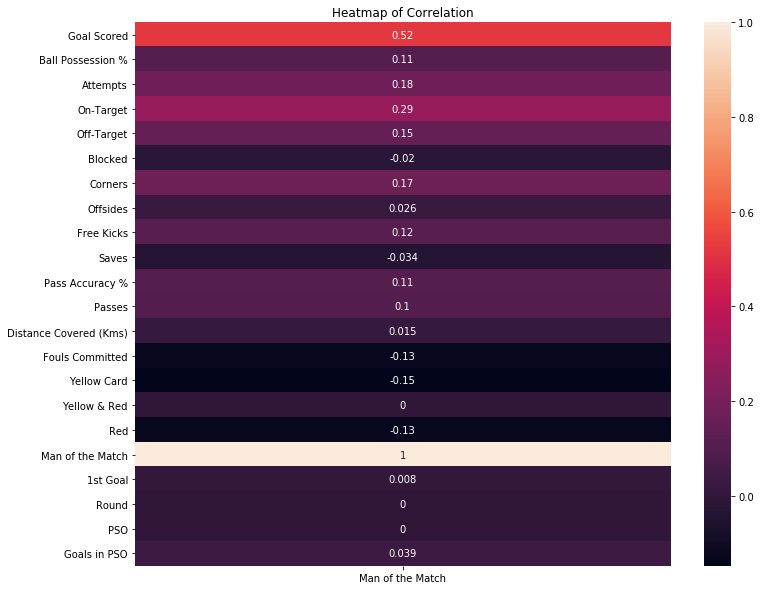

In [22]:
import seaborn as sns
plt.figure(figsize = (12,10))
heat = sns.heatmap(data = corr, annot = True)
plt.title('Heatmap of Correlation')

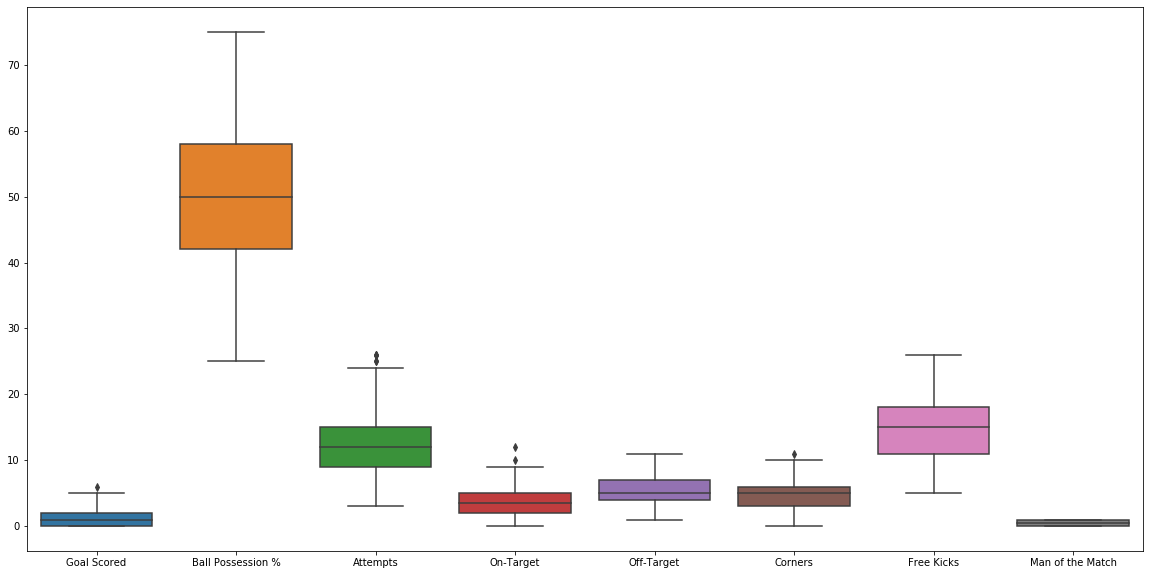

In [23]:
var = corr[corr['Man of the Match'] > 0.11].index
dummy_data = stats_clean[var]
plt.figure(figsize=(20,10))
sns.boxplot(data = dummy_data)
plt.show()

## Remove outliers

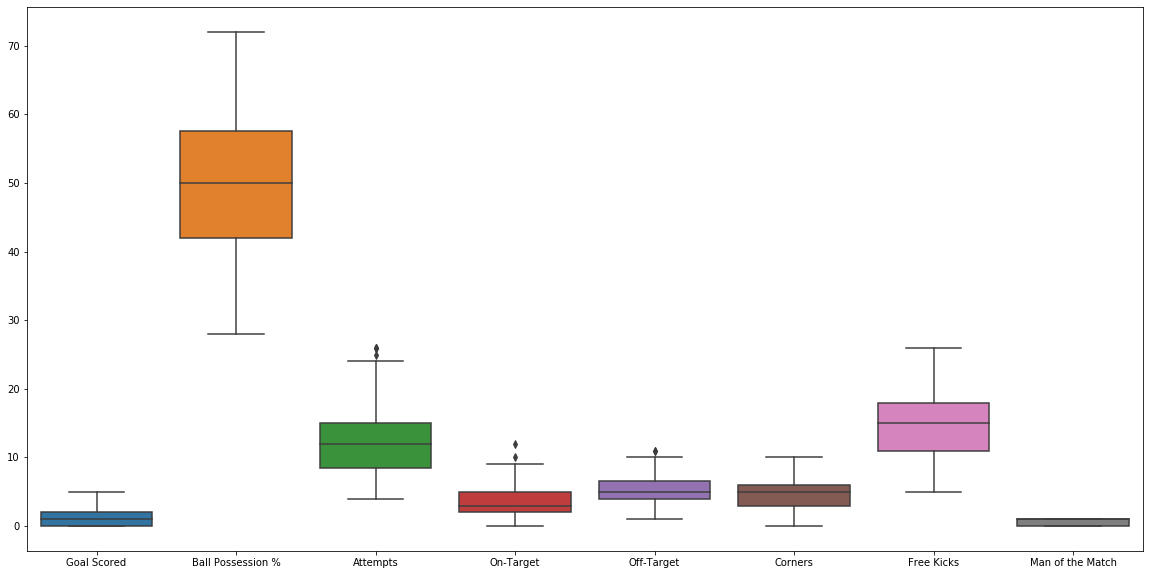

In [24]:
Q1 = stats.quantile(0.25)
Q3 = stats.quantile(0.75)
IQR = stats.var()

stats_final = stats_clean[~((stats < (Q1 - 2.5 * IQR)) | (stats > (Q3 + 2.5 * IQR))).any(axis = 1)]

var = corr[corr['Man of the Match'] > 0.11].index
dummy_data = stats_final[var]
plt.figure(figsize=(20,10))
sns.boxplot(data = dummy_data)
plt.show()

## Define X and y

In [25]:
y = stats_final['Man of the Match']
X = stats_final.drop('Man of the Match', axis=1)
print(X.shape)
print(y.shape)

(107, 85)
(107,)


## Train classifiers

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

models = []

models.append(('LR', LogisticRegression(solver='liblinear', multi_class = 'ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma = 'auto')))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits = 20, random_state = 42, shuffle = True)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = '%s(acc): %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s(f1): %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR(acc): 0.732500 (0.189258)
LR(f1): 0.641111 (0.317165)
KNN(acc): 0.490000 (0.210713)
KNN(f1): 0.429762 (0.260511)
CART(acc): 0.600000 (0.191703)
CART(f1): 0.489286 (0.281673)
SVM(acc): 0.532500 (0.237316)
SVM(f1): 0.613810 (0.213090)


## Compare classifiers

/home/jaco/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


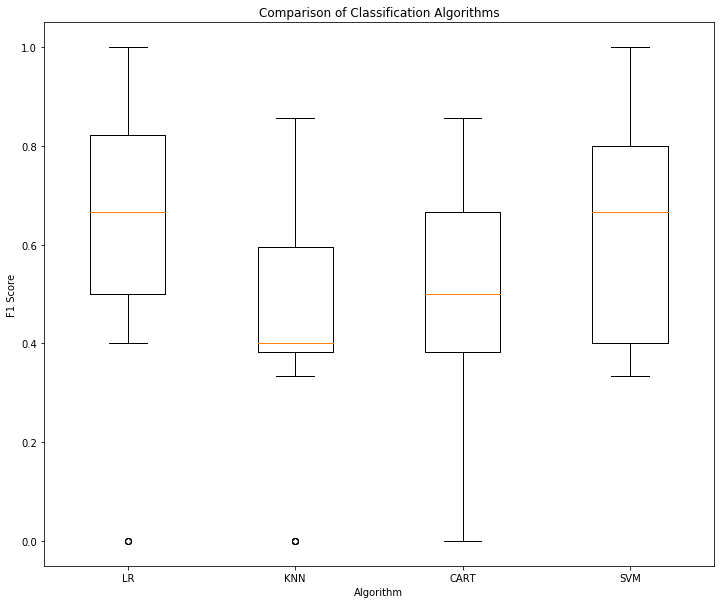

In [27]:
#for f1 score
fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('F1 Score')

#values=np.arange(0,10)
#print(values[1::2])

plt.boxplot(results[1::2])
ax = fig.add_subplot(111)
ax.set_xticklabels(names[1::2])
plt.show()

## Predict

In [28]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [29]:
from sklearn import metrics

print(metrics.accuracy_score(predictions, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.6363636363636364
[[4 2]
 [2 3]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.60      0.60      0.60         5

    accuracy                           0.64        11
   macro avg       0.63      0.63      0.63        11
weighted avg       0.64      0.64      0.64        11



## Interpret the scores

Precision score
Recall score
F1 score
FN and FP values

## Dummy classifier

In [30]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
predictions = dummy.predict(X_test)

/home/jaco/.local/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [31]:
from sklearn import metrics

print(metrics.accuracy_score(predictions, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.36363636363636365
[[1 5]
 [2 3]]
              precision    recall  f1-score   support

           0       0.33      0.17      0.22         6
           1       0.38      0.60      0.46         5

    accuracy                           0.36        11
   macro avg       0.35      0.38      0.34        11
weighted avg       0.35      0.36      0.33        11

